In [11]:
import requests
from bs4 import BeautifulSoup
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import seaborn as sns
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
url = 'https://www.tiobe.com/tiobe-index/'

content = requests.get(url)

soup = BeautifulSoup(content.text,"lxml")

tables = soup.find_all("table")

df_tb=pd.read_html(str(tables[0]), header = 0)[0]

In [16]:
df_tb.head()

,Jun 2019,Jun 2018,Change,Programming Language,Ratings,Change.1
0,1,1,NaN,Java,15.004,-0.36
1,2,2,NaN,C,13.300,-1.64
2,3,4,NaN,Python,8.530,2.77
3,4,3,NaN,C++,7.384,-0.95
4,5,6,NaN,Visual Basic .NET,4.624,0.86


In [13]:
sns.set(style = "whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [14]:
df_tb['Ratings'] = df_tb.loc[:,'Ratings'].apply(lambda x: float(x.strip("%")))
df_tb['Change.1'] = df_tb.loc[:,'Change.1'].apply(lambda x: float(x.strip("%")))

Text(0.5,1,'Jun 2019 - Programming Popularity')

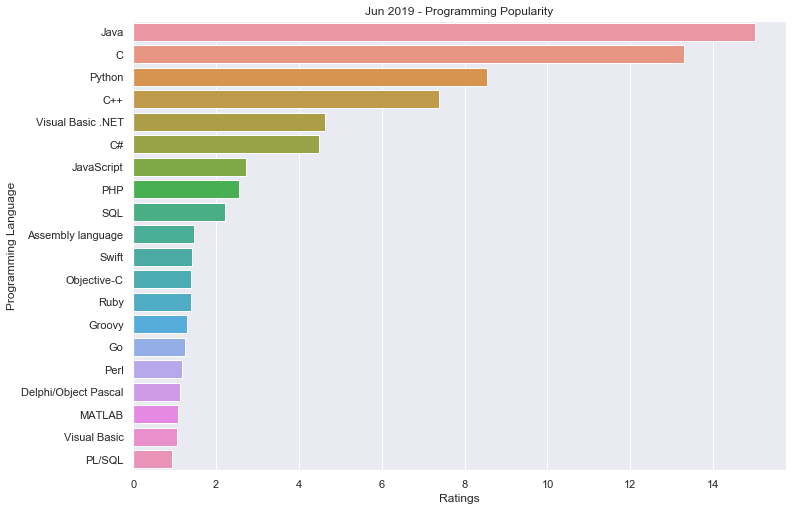

In [17]:
sns.barplot('Ratings', 'Programming Language', data = df_tb).set_title('Jun 2019 - Programming Popularity')

In [4]:
df_tb.drop(['Jun 2018', 'Change', 'Change.1', 'Jun 2019'], axis=1, inplace=True)
df_tb.set_index('Programming Language', inplace=True)
df_tb=df_tb.replace('\%','',regex=True).astype(float)
df_tb.head()

,Ratings
Programming Language,
Java,15.004
C,13.300
Python,8.530
C++,7.384
Visual Basic .NET,4.624


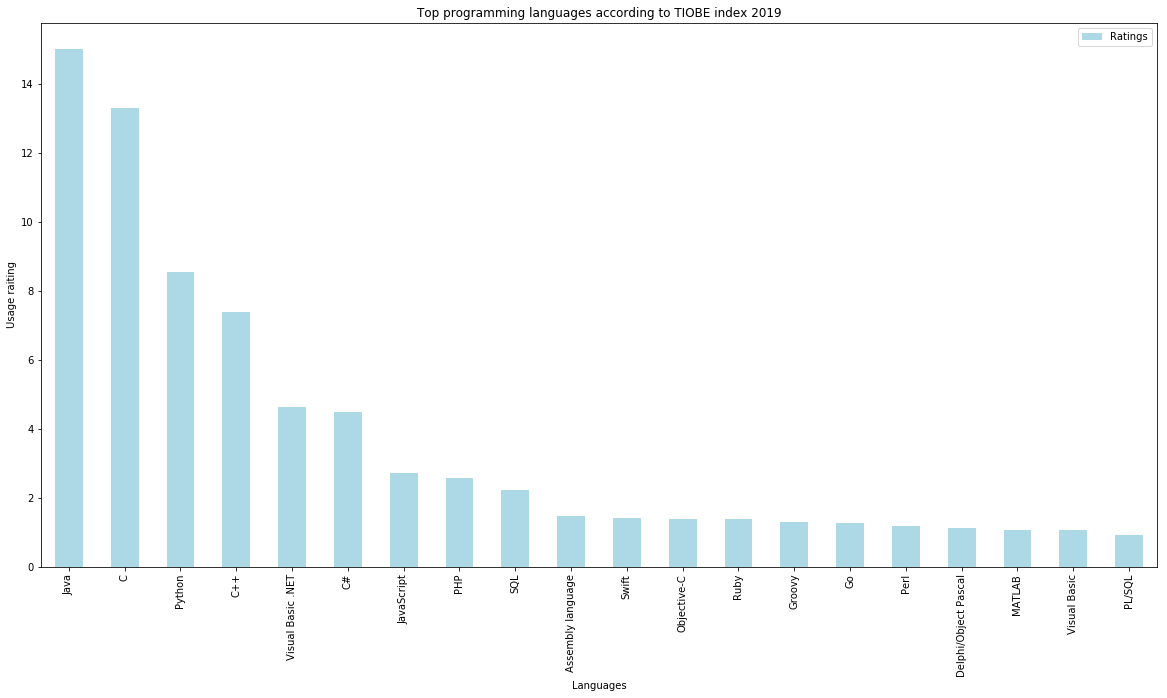

In [5]:
df_tb.plot(kind='bar', 
             stacked=False,
             figsize=(20, 10),
            color='lightblue')

plt.title('Top programming languages according to TIOBE index 2019')
plt.ylabel('Usage raiting')
plt.xlabel('Languages')

plt.show()

In [6]:
df_pypl2017 = pd.read_excel('pypl_june_2017.xlsx')
df_pypl2017.head()

,Rank,Language,Share,Trend
0,1,Java,0.227,-0.012
1,2,Python,0.161,0.038
2,3,PHP,0.093,-0.009
3,4,C#,0.082,-0.006
4,5,Javascript,0.079,0.005


In [7]:
df_pypl2017.drop(['Trend','Rank'], inplace=True, axis=1)
df_pypl2017.rename(columns={'Share':'Raiting', 'Language':'Programming Language'}, inplace=True)
df_pypl2017.head()

,Programming Language,Raiting
0,Java,0.227
1,Python,0.161
2,PHP,0.093
3,C#,0.082
4,Javascript,0.079


In [8]:
df_pypl2017.set_index('Programming Language', inplace=True)
df_pypl2017.head()

,Raiting
Programming Language,
Java,0.227
Python,0.161
PHP,0.093
C#,0.082
Javascript,0.079


In [121]:
df_ul=pd.read_csv("top_proglang_2016.csv")
df_ul.info()
df_ul.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17461 entries, 0 to 17460
Columns: 1411 entries, user_id to zsh-configuration
dtypes: float64(1320), int64(90), object(1)
memory usage: 188.0+ MB


,user_id,assembly,batchfile,c,c#,c++,clojure,coffeescript,css,elixir,...,yeoman-generator,yii,yii2,youtube,zephir,zero-configuration,zeromq,zookeeper,zsh,zsh-configuration
0,007lva,0.0,0.0,0.0,0.0000,0.00000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,06wj,0.0,0.0,0.0,0.0171,0.00000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0bserver07,0.0,0.0,0.0,0.0000,0.00000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0rca,0.0,0.0,0.0,0.0000,0.00000,0.252336,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0x00A,0.0,0.0,0.0,0.0000,0.10231,0.000000,0.0,0.005776,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
df_ul.shape

(17461, 1411)

In [123]:
proglang=np.array(df_tb['Programming Language'])
proglang = np.array([x.lower() if isinstance(x, str) else x for x in proglang])
proglang

array(['java', 'c', 'python', 'c++', 'visual basic .net', 'c#',
       'javascript', 'php', 'sql', 'assembly language', 'swift',
       'objective-c', 'ruby', 'groovy', 'go', 'perl',
       'delphi/object pascal', 'matlab', 'visual basic', 'pl/sql'],
      dtype='<U20')

In [124]:
rows=[]
for ind in df_ul.columns:
    bol=True
    for x in proglang:
        if ind == x:
            bol=False
            break
    if bol:
        rows.append(ind)
            
df_ul.drop(rows, inplace=True, axis=1)
df_ul.head()

,c,c#,c++,go,java,javascript,matlab,objective-c,perl,php,python,ruby,swift,sql
0,0.0,0.0000,0.00000,0.005747,0.015326,0.049808,0.0,0.000000,0.000000,0.0,0.010536,0.216475,0.0,0.0
1,0.0,0.0171,0.00000,0.000000,0.000000,0.327881,0.0,0.000000,0.000000,0.0,0.028996,0.000000,0.0,0.0
2,0.0,0.0000,0.00000,0.000000,0.000000,0.011375,0.0,0.025853,0.003102,0.0,0.185109,0.007239,0.0,0.0
3,0.0,0.0000,0.00000,0.000000,0.018692,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.004673,0.0,0.0
4,0.0,0.0000,0.10231,0.000000,0.000000,0.268152,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0


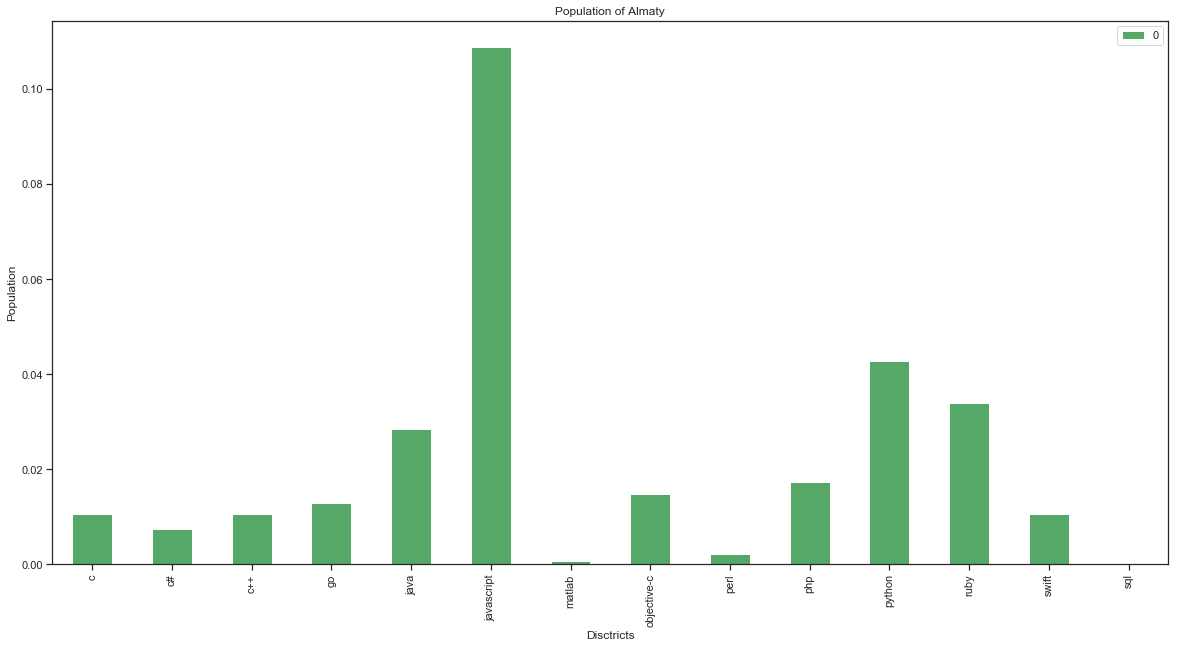

In [125]:
df=pd.DataFrame(df_ul.mean())
df.plot(kind='bar', 
             stacked=False,
             figsize=(20, 10),
            color='g',
            label=df[0]
             )

plt.title('Population of Almaty')
plt.ylabel('Population')
plt.xlabel('Disctricts')
plt.show()

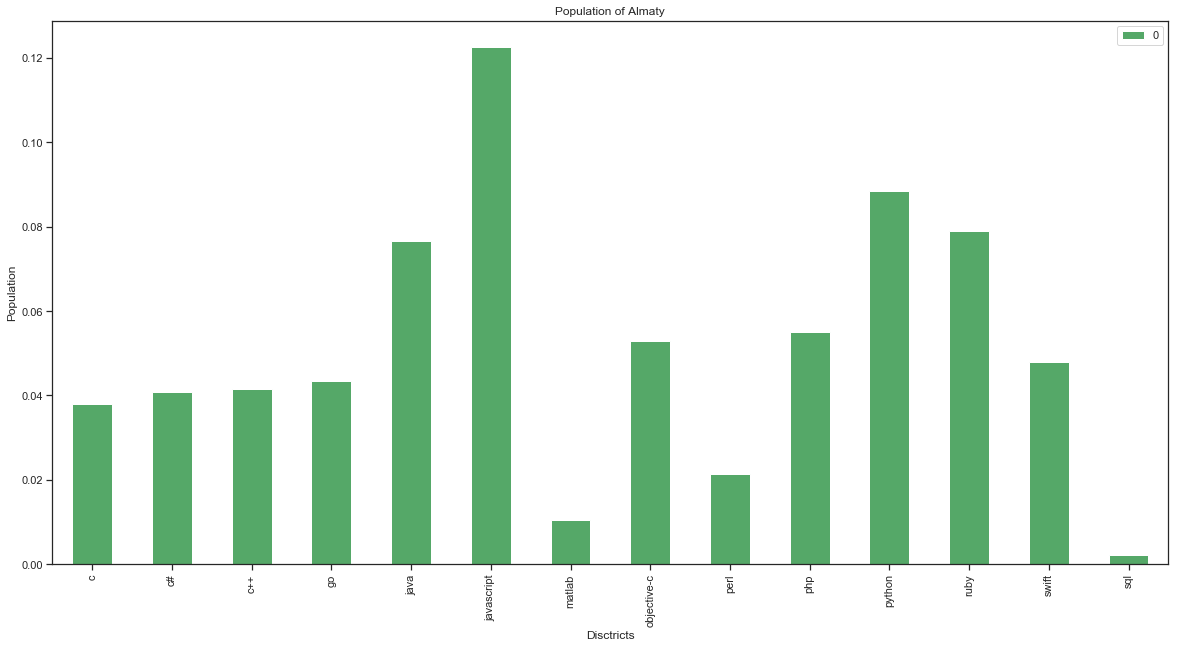

In [128]:
df=pd.DataFrame(df_ul.std())
df.plot(kind='bar', 
             stacked=False,
             figsize=(20, 10),
            color='g',
            label=df[0]
             )

plt.title('Population of Almaty')
plt.ylabel('Population')
plt.xlabel('Disctricts')
plt.show()

In [129]:
for ind in df_ul.columns:
    

,c,c#,c++,go,java,javascript,matlab,objective-c,perl,php,python,ruby,swift,sql
count,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000
mean,0.010536,0.007451,0.010683,0.012977,0.028533,0.108883,0.000778,0.014858,0.002171,0.017286,0.042778,0.033991,0.010610,0.000052
std,0.038098,0.040868,0.041504,0.043427,0.076522,0.122673,0.010533,0.053020,0.021452,0.055088,0.088514,0.079000,0.047869,0.002227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.010870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.067114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.016990,0.174345,0.000000,0.000000,0.000000,0.001043,0.042476,0.024349,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000


In [86]:
df.rename(columns={'2017':'2016'}, inplace=True)
df.head()

,2016
c,0.010536
c#,0.007451
c++,0.010683
go,0.012977
java,0.028533


In [87]:
df.sort_values(by=['2016'], ascending=False)

,2016
javascript,0.108883
python,0.042778
ruby,0.033991
java,0.028533
php,0.017286
objective-c,0.014858
go,0.012977
c++,0.010683
swift,0.010610
c,0.010536


In [85]:
df_2017=pd.read_excel('pypl_june_2017.xlsx')
df_2017['Language'] = np.array([x.lower() if isinstance(x, str) else x for x in df_2017['Language']])
df_2017.rename(columns={'Share':'2017'}, inplace=True)
df_2017.drop(['Rank', 'Trend'], axis=1, inplace=True)
df_2017.set_index('Language', inplace=True)
df_2017

,2017
Language,
java,0.227
python,0.161
php,0.093
c#,0.082
javascript,0.079
c++,0.068
c,0.066
objective-c,0.037
r,0.036


In [89]:
df_2017['2017']=df_2017['2017']*100
df_2017

,2017
Language,
java,22.7
python,16.1
php,9.3
c#,8.2
javascript,7.9
c++,6.8
c,6.6
objective-c,3.7
r,3.6


In [92]:
df_2016_sum=df['2016'].sum()

In [93]:
df['2016']=df['2016']*100/df_2016_sum
df

,2016
c,3.493384
c#,2.470450
c++,3.542398
go,4.302859
java,9.461085
javascript,36.103349
matlab,0.257962
objective-c,4.926703
perl,0.719972
php,5.731642


In [100]:
df.index.name='Language'

In [101]:
df=pd.merge(df, df_2017, on='Language', how='outer')
df

,2016,2017
Language,,
c,3.493384,6.6
c#,2.470450,8.2
c++,3.542398,6.8
go,4.302859,0.5
java,9.461085,22.7
javascript,36.103349,7.9
matlab,0.257962,2.5
objective-c,4.926703,3.7
perl,0.719972,0.8


In [106]:
df_2018=pd.read_excel('top_proglang_2018.xlsx')
df_2018.rename(columns={'Used regularly':'2018'}, inplace=True)
df_2018.drop(['To be adopted/migrated to soon'], inplace=True, axis=1)
df_2018.set_index('Language', inplace=True)
df_2018

,2018
Language,
Javascript,0.64
HTML / CSS,0.55
Java,0.51
SQL and its extensions,0.47
Python,0.41
Shell scripting languages,0.29
PHP,0.26
C#,0.22
C++,0.18


In [108]:
df_2018.index = np.array([x.lower() if isinstance(x, str) else x for x in df_2018.index])

In [110]:
df_2018.index.name='Language'
df_2018

,2018
Language,
javascript,0.64
html / css,0.55
java,0.51
sql and its extensions,0.47
python,0.41
shell scripting languages,0.29
php,0.26
c#,0.22
c++,0.18


In [111]:
df=pd.merge(df, df_2018, on='Language', how='outer')
df

,2016,2017,2018
Language,,,
c,3.493384,6.6,0.16
c#,2.470450,8.2,0.22
c++,3.542398,6.8,0.18
go,4.302859,0.5,0.12
java,9.461085,22.7,0.51
javascript,36.103349,7.9,0.64
matlab,0.257962,2.5,NaN
objective-c,4.926703,3.7,0.05
perl,0.719972,0.8,NaN


In [113]:
df_2018['2018']=df_2018['2018']*100/df_2018['2018'].sum()

In [114]:
df_2018['2018'].sum()

100.00000000000001

In [116]:
df=pd.merge(df, df_2018, on='Language', how='outer')
df

,2016,2017,2018_x,2018_y
Language,,,,
c,3.493384,6.6,0.16,3.433476
c#,2.470450,8.2,0.22,4.721030
c++,3.542398,6.8,0.18,3.862661
go,4.302859,0.5,0.12,2.575107
java,9.461085,22.7,0.51,10.944206
javascript,36.103349,7.9,0.64,13.733906
matlab,0.257962,2.5,NaN,NaN
objective-c,4.926703,3.7,0.05,1.072961
perl,0.719972,0.8,NaN,NaN


In [117]:
df.drop(['2018_x'], inplace=True, axis=1)
df.rename(columns={'2018_y':'2018'}, inplace=True)
df

,2016,2017,2018
Language,,,
c,3.493384,6.6,3.433476
c#,2.470450,8.2,4.721030
c++,3.542398,6.8,3.862661
go,4.302859,0.5,2.575107
java,9.461085,22.7,10.944206
javascript,36.103349,7.9,13.733906
matlab,0.257962,2.5,NaN
objective-c,4.926703,3.7,1.072961
perl,0.719972,0.8,NaN
